In [2]:
import pandas as pd  # Pandas, veri analizi ve işleme için kullanılan güçlü bir kütüphanedir.
import numpy as np  # NumPy, büyük ve çok boyutlu dizilerle işlem yapmaya olanak tanır.
import matplotlib.pyplot as plt  # Matplotlib, grafik ve görselleştirme için kullanılır.
import seaborn as sns  # Seaborn, estetik açıdan daha güzel veri görselleştirmeleri yapmayı sağlar.
import warnings  
warnings.filterwarnings("ignore")  # Kod çalıştırılırken gereksiz uyarıları gizlemek için kullanılır.


In [3]:
df = pd.read_csv("C:/Users/HP/Desktop/data.csv", encoding="ISO-8859-1") # CSV dosyasını okur. 
# Not: Farklı bir karakter kodlaması hatası verdiği için - → df = pd.read_csv("C:/Users/HP/Desktop/data.csv", encoding="ISO-8859–1")

df.head()  # İlk 5 satırı gösterir.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info() # Veri çerçevesinin genel bilgisini gösterir. | 
df.describe() #Sayısal sütunlara ait istatistiksel özet sunar. | 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum() #Eksik değerleri sayar. 


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(inplace=True) # Eksik değerleri kaldırır ve veriyi günceller.

In [7]:
df.isnull().sum() #Eksik değerleri sayar. 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.columns # Sütun isimlerini listeler.


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns] # Sütun adlarını temizler ve düzenler.

# Mevcut sütun adlarına göre düzenleme
df['invoicedate'] = pd.to_datetime(df['invoicedate']) #Tarih sütununu datetime formatına çevirir. 
df['unitprice'] = df['unitprice'].astype(float)  # Fiyat sütununu float veri türüne çevirir.


Bu kodun amacı, **veriyi düzenleyerek daha kolay işlenebilir hale getirmek**. İşte adım adım ne yaptığımız:

1️⃣ **Sütun isimlerini temizledik:**  
   - `strip()` ile baştaki ve sondaki boşlukları kaldırdık.  
   - `lower()` ile tüm harfleri küçük yaptık.  
   - `" "` boşlukları `"_"` ile değiştirdik.  
   ➝ **Sonuç:** Daha tutarlı ve erişimi kolay sütun isimleri.  

2️⃣ **Tarih sütununu doğru formata çevirdik:**  
   -  `"invoicedate"` sütununu `pd.to_datetime()` ile tarih formatına dönüştürdük.  
   ➝ **Sonuç:** Tarihler artık analiz edilebilir ve sıralanabilir hale geldi.  

3️⃣ **Fiyat sütununu sayısal formata çevirdik:**  
   - `"unitprice"` sütununu `astype(float)` ile `float` formatına çevirdik.  
   ➝ **Sonuç:** Artık fiyat sütunu üzerinde matematiksel işlemler yapılabilir.  

Bu işlemler sayesinde **veriyi daha düzenli hale getirip analiz edilebilir formata soktuk**. 📊💡  


In [10]:
df.columns # Veri çerçevesindeki sütun isimlerini gösterir.

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [11]:
#sales_by_country.shape # Veri çerçevesinin satır ve sütun sayısını gösterir. 

In [12]:
print(df['country'].unique()) # Veri çerçevesindeki benzersiz ülkeleri listeler. | 

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


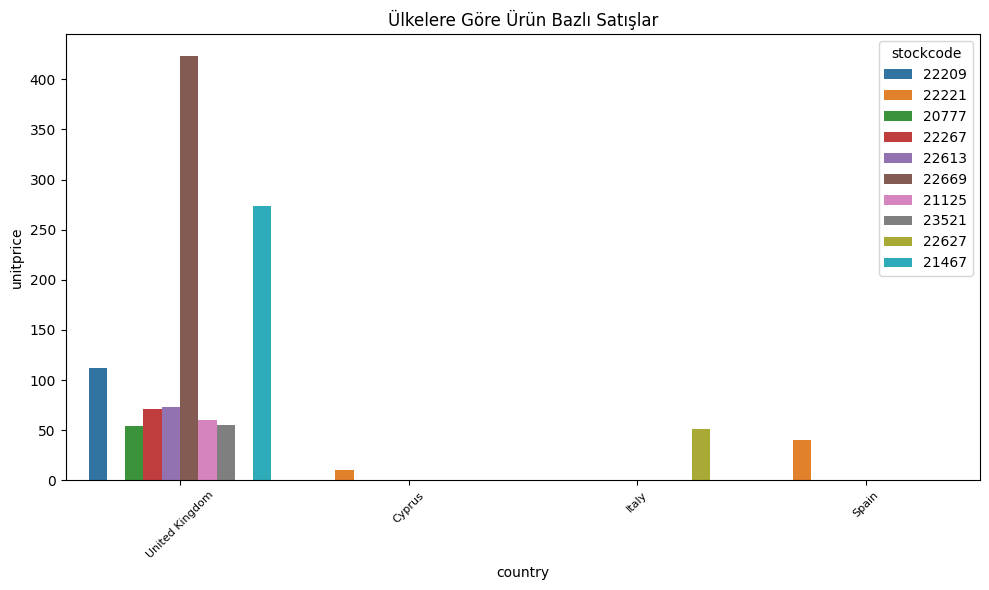

In [13]:
# Veri setini gruplandır ve toplam satışları hesapla
sales_by_country = df.groupby(['country', 'stockcode'])['unitprice'].sum().reset_index()

# 🔍 Eğer veri çok büyükse, sadece belirli bir örnek alalım
sales_by_country = sales_by_country.sample(50, random_state=42)  # Rastgele 50 satır seç

# 🔍 En çok satılan 10 ürünü seçerek grafiği sadeleştir
top_products = sales_by_country.groupby('stockcode')['unitprice'].sum().nlargest(10).index
sales_by_country = sales_by_country[sales_by_country['stockcode'].isin(top_products)]

# 📊 Grafik oluşturma
plt.figure(figsize=(10,6))  # Grafik boyutunu optimize et
sns.barplot(data=sales_by_country, x='country', y='unitprice', hue='stockcode')

# 🔍 X eksenindeki etiketleri okunaklı hale getir
plt.title('Ülkelere Göre Ürün Bazlı Satışlar')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

# 📌 Grafik gösterimi
plt.show()

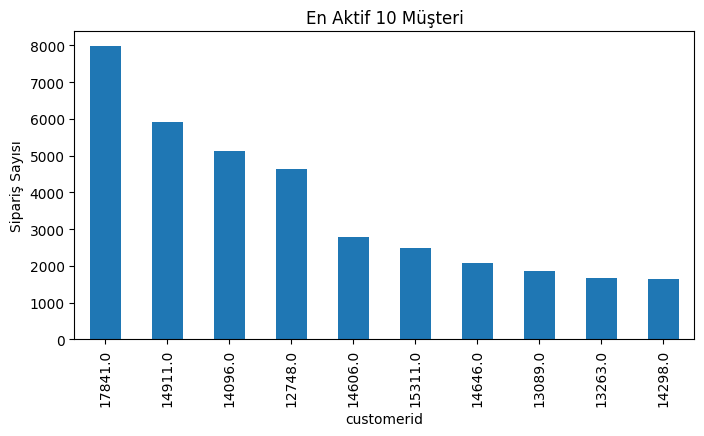

In [14]:
top_customers = df['customerid'].value_counts().head(10) # En çok sipariş veren ilk 10 müşteriyi seçer.
top_customers.plot(kind='bar', figsize=(8,4), title="En Aktif 10 Müşteri") # En aktif müşterileri çubuk grafikle gösterir.
plt.ylabel('Sipariş Sayısı') # Y eksenine "Sipariş Sayısı" etiketi ekler.
plt.show() # Grafiği ekranda gösterir. 


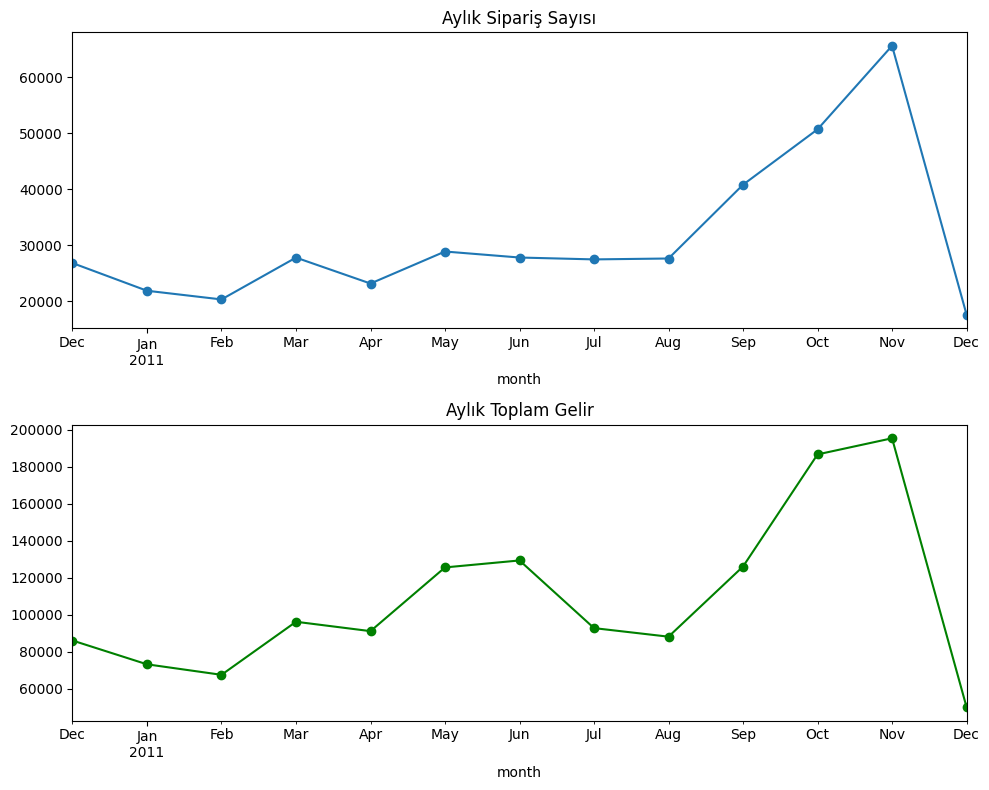

In [15]:
df['month'] = df['invoicedate'].dt.to_period('M') # Fatura tarihinden ay bilgisini çıkarır.
monthly_orders = df.groupby('month').size() # Aylık sipariş sayılarını hesaplar.
monthly_revenue = df.groupby('month')['unitprice'].sum() # Aylık toplam geliri hesaplar. 

fig, ax = plt.subplots(2, 1, figsize=(10,8)) # İki grafik oluşturmak için eksenleri ayarlar. 

monthly_orders.plot(ax=ax[0], kind='line', marker='o', title='Aylık Sipariş Sayısı') # Sipariş trendini çizgi grafikle gösterir. 
monthly_revenue.plot(ax=ax[1], kind='line', color='green', marker='o', title='Aylık Toplam Gelir') #Aylık gelir trendini çizgi grafikle gösterir.
plt.tight_layout() #Grafik bileşenlerinin düzenini optimize eder. 
plt.show()  #Grafikleri ekranda gösterir. 

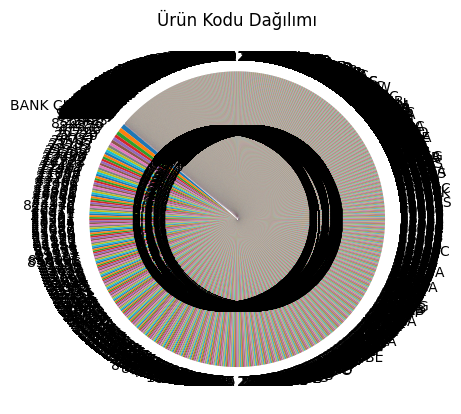

In [16]:
df['stockcode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140) # Ürün kodlarının dağılımını pasta grafiğiyle gösterir. 
plt.title('Ürün Kodu Dağılımı') #Grafiğe başlık ekler. 
plt.ylabel('') # Y ekseni etiketini kaldırarak daha temiz bir görünüm sağlar. 
plt.show() # Grafiği ekranda gösterir. | 


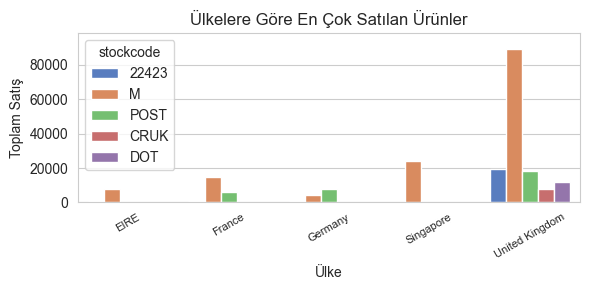

In [17]:
# Veri setini gruplandır ve toplam satışları hesapla
sales_by_country = df.groupby(['country', 'stockcode'])['unitprice'].sum().reset_index()

# En çok satış yapan **ilk 5 ülkeyi** seç
top_countries = sales_by_country.groupby('country')['unitprice'].sum().nlargest(5).index
sales_by_country = sales_by_country[sales_by_country['country'].isin(top_countries)]

# **En çok satılan ilk 5 ürünü** seçerek grafiği daha sade hale getir
top_products = sales_by_country.groupby('stockcode')['unitprice'].sum().nlargest(5).index
sales_by_country = sales_by_country[sales_by_country['stockcode'].isin(top_products)]

# Seaborn tema ayarı ve renk paleti
sns.set_style("whitegrid")
sns.set_palette("muted")  # Daha yumuşak tonlar

# 📊 Küçük figür boyutuyla grafik oluşturma
plt.figure(figsize=(6,3))  # Daha küçük grafik boyutu
sns.barplot(data=sales_by_country, x='country', y='unitprice', hue='stockcode')

# Ekseni düzenleme
plt.xlabel('Ülke', fontsize=10)
plt.ylabel('Toplam Satış', fontsize=10)
plt.title('Ülkelere Göre En Çok Satılan Ürünler', fontsize=12)

# X ekseni etiketlerini okunaklı hale getir
plt.xticks(rotation=30, fontsize=8)  # Daha küçük ve daha az dönmüş etiketler

# Y eksenini sınırla
plt.ylim(0, sales_by_country['unitprice'].max() * 1.1)  # Maksimum değerin %10 fazlasına ayarla

plt.tight_layout()
plt.show()

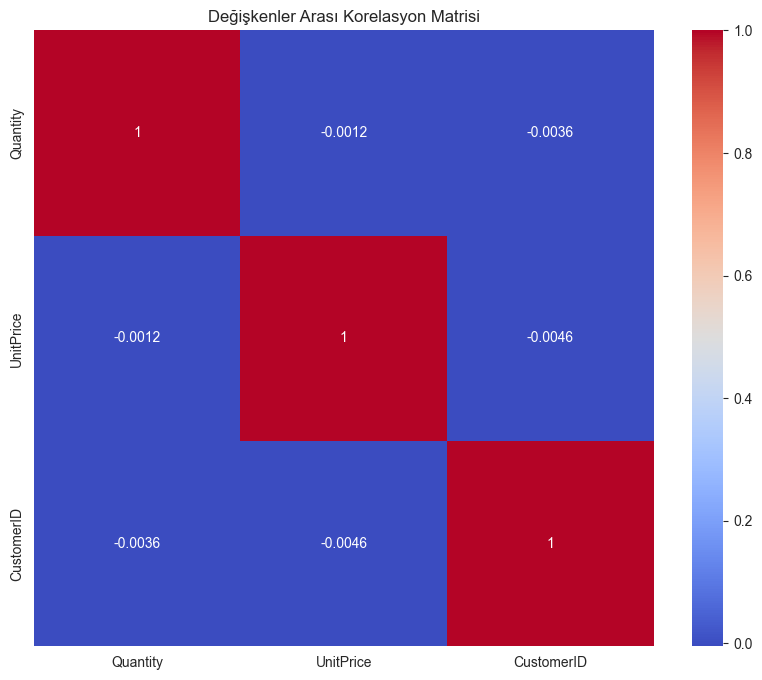

In [27]:
corr = df.corr(numeric_only=True)  # Sayısal değişkenler arasındaki korelasyonu hesaplar.

plt.figure(figsize=(10, 8))  # Grafik boyutunu belirler. 
sns.heatmap(corr, annot=True, cmap='coolwarm')  # Korelasyon matrisini ısı haritası olarak gösterir.
plt.title("Değişkenler Arası Korelasyon Matrisi")  # Grafiğe başlık ekler.
plt.show()  # Grafiği ekranda gösterir. 

In [54]:
df = pd.read_csv("C:/Users/HP/Desktop/data.csv", encoding="ISO-8859-1")  # Yeniden yükleyerek eski haline döndür
print(df.head())  # İlk satırları kontrol et

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [55]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [56]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Tüm sütun isimlerini temizle
print(df.columns)  # Güncellenmiş sütun adlarını kontrol et

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')


In [79]:
print(type(df.index))  # Mevcut indeks türünü kontrol et

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [58]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])  # Tarih formatına çevir
df.set_index('invoicedate', inplace=True)  # Fatura tarihini indeks olarak ayarla

print(type(df.index))  # İndeksin gerçekten DatetimeIndex olup olmadığını doğrula

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


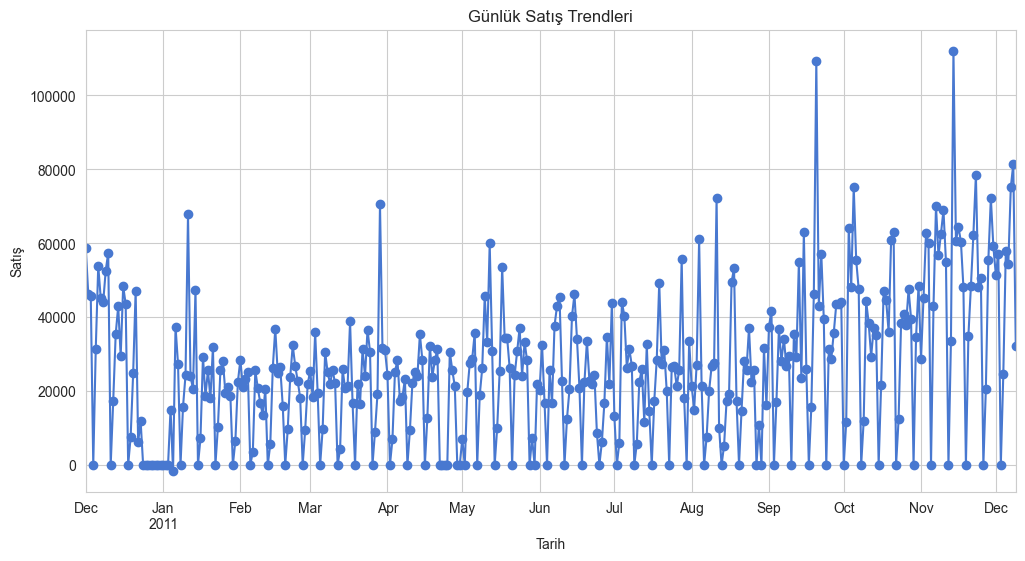

In [60]:
df['sales'] = df['quantity'] * df['unitprice']  # Toplam satış sütunu oluştur
daily_sales = df.resample('D').sum(numeric_only=True)['sales']  # Günlük satışları hesapla

# 📊 Grafik oluşturma
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o')  
plt.title("Günlük Satış Trendleri")  
plt.xlabel("Tarih")  
plt.ylabel("Satış")  
plt.grid(True)  
plt.show()

In [61]:
print(daily_sales.index[:10])  # İlk 10 tarih değerini kontrol et

DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-04',
               '2010-12-05', '2010-12-06', '2010-12-07', '2010-12-08',
               '2010-12-09', '2010-12-10'],
              dtype='datetime64[ns]', name='invoicedate', freq='D')


In [62]:
print(daily_sales.describe())  # Günlük satışların istatistiksel özetini görüntüle

count       374.000000
mean      26063.497150
std       20031.204764
min       -1566.230000
25%       10410.657500
50%       25005.820000
75%       36982.692500
max      112141.110000
Name: sales, dtype: float64


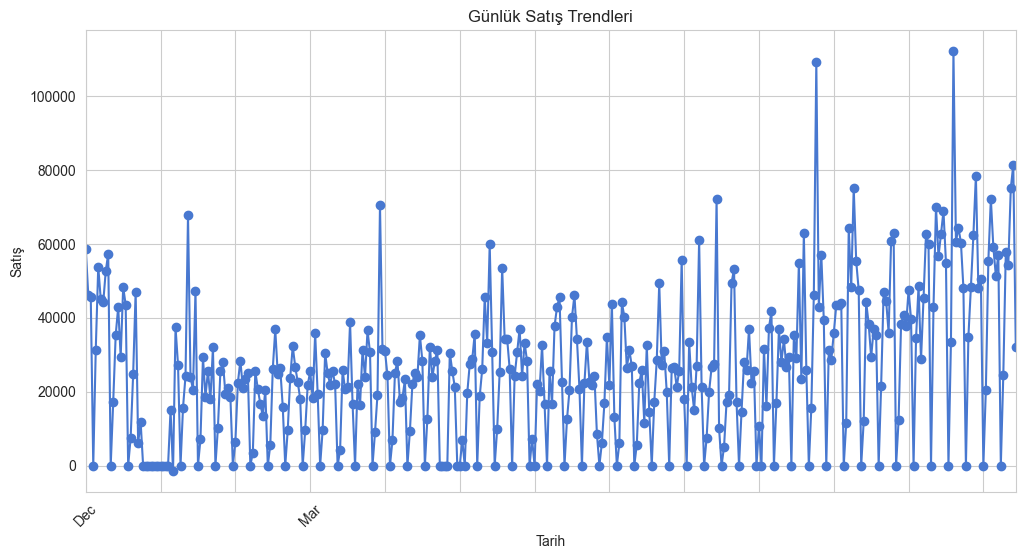

In [63]:
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o')  
plt.title("Günlük Satış Trendleri")  
plt.xlabel("Tarih")  
plt.ylabel("Satış")  
plt.xticks(daily_sales.index[::30], rotation=45)  # X eksenini her 30 günde bir etiketle
plt.grid(True)  
plt.show()

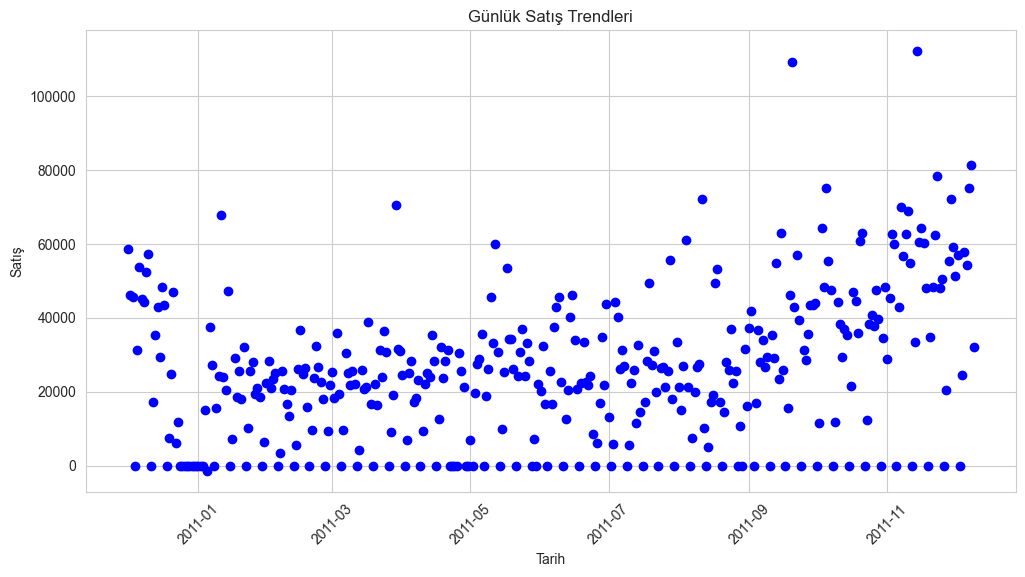

In [66]:
plt.figure(figsize=(12, 6))
plt.scatter(daily_sales.index, daily_sales, marker='o', color='blue')  # Noktaları göster
plt.title("Günlük Satış Trendleri")  
plt.xlabel("Tarih")  
plt.ylabel("Satış")  
plt.grid(True)  
plt.xticks(rotation=45)  # X eksenindeki tarihleri daha okunabilir hale getir
plt.show()

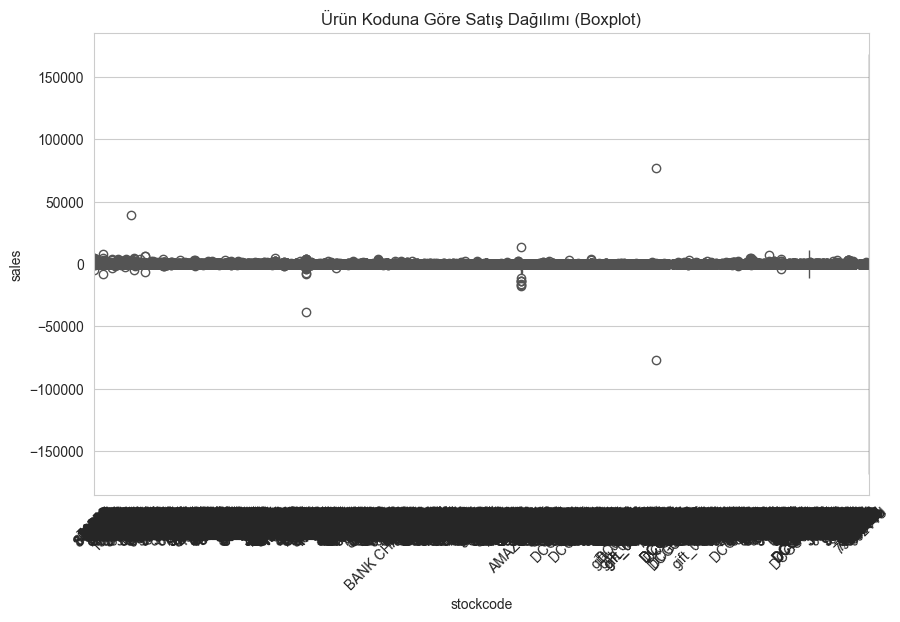

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stockcode', y='sales', data=df)  # Ürün koduna göre satış dağılımı
plt.title("Ürün Koduna Göre Satış Dağılımı (Boxplot)")  # Başlık
plt.xticks(rotation=45)  # X eksenindeki etiketleri daha okunabilir hale getirdik
plt.show()

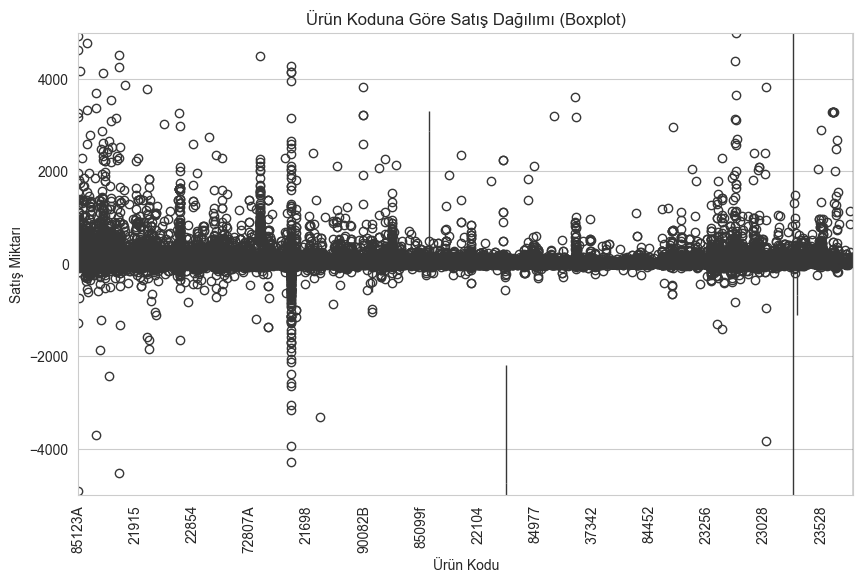

In [70]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Daha temiz bir arka plan
sns.boxplot(x='stockcode', y='sales', data=df, palette="coolwarm")  # Renklendirme ile daha okunaklı hale getir

plt.title("Ürün Koduna Göre Satış Dağılımı (Boxplot)")  
plt.xlabel("Ürün Kodu")  
plt.ylabel("Satış Miktarı")  

# 🔹 X eksenini optimize ederek sadece belirli etiketleri göster
plt.xticks(rotation=90)  # Dikey çevirerek okunaklı hale getir
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=15))  # `n` yerine `nbins` kullanarak hatayı düzelt

# 🔹 Y eksenindeki aşırı uçları kırp ve veriyi daha net gör
plt.ylim(-5000, 5000)  # Ekstrem değerleri kırp

plt.show()

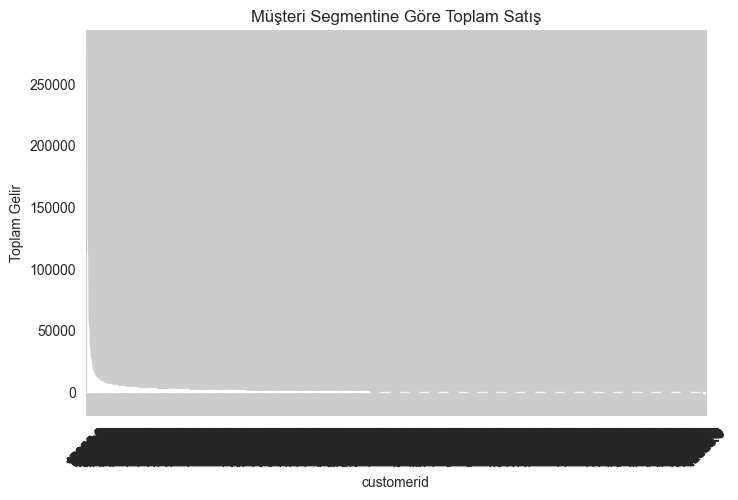

In [ ]:
segment_sales = df.groupby('customerid')['sales'].sum().sort_values(ascending=False)  
# Her müşteri için toplam satışları hesaplar ve büyükten küçüğe sıralar.  
plt.figure(figsize=(8, 5))  # Grafik boyutunu belirler. 
segment_sales.plot(kind='bar', color='skyblue')  # Müşterilerin toplam satışlarını çubuk grafik ile gösterir.    
plt.title("Müşteri Segmentine Göre Toplam Satış")  # Grafiğe başlık ekler.  
plt.ylabel("Toplam Gelir")  # Y ekseni etiketini 'Toplam Gelir' olarak belirler.  
plt.xticks(rotation=45)  # X ekseni etiketlerini eğerek daha okunaklı hale getirir.  
plt.show()  # Grafiği ekranda gösterir.  


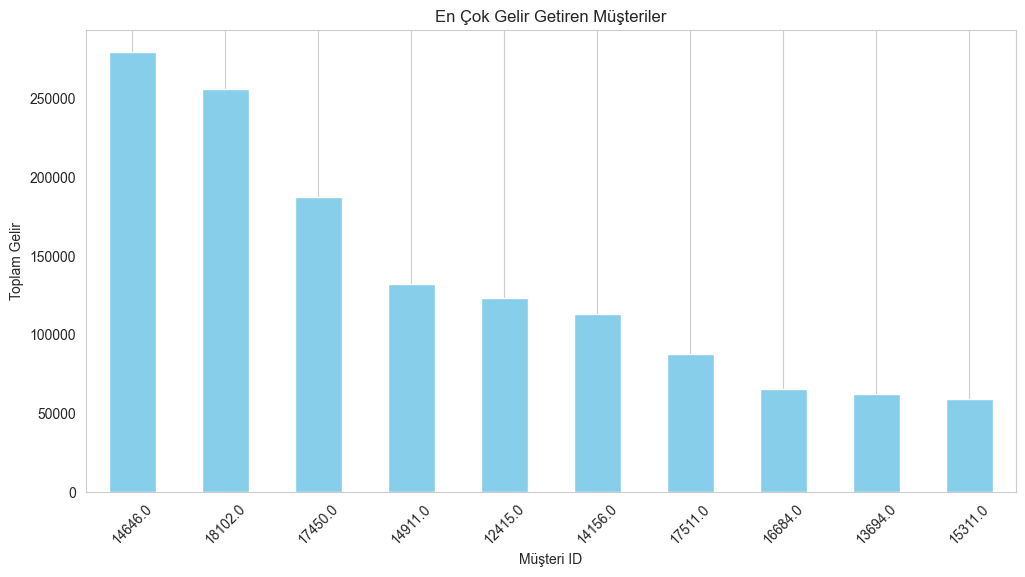

In [74]:
top_n_customers = segment_sales.head(10)  # En çok satış yapan ilk 10 müşteri
plt.figure(figsize=(12, 6))
top_n_customers.plot(kind='bar', color='skyblue')
plt.title("En Çok Gelir Getiren Müşteriler")  
plt.ylabel("Toplam Gelir")  
plt.xlabel("Müşteri ID")  
plt.xticks(rotation=45)  
plt.grid(axis='y')  # Daha iyi okunabilirlik için ızgara çizgileri ekleyelim  
plt.show()

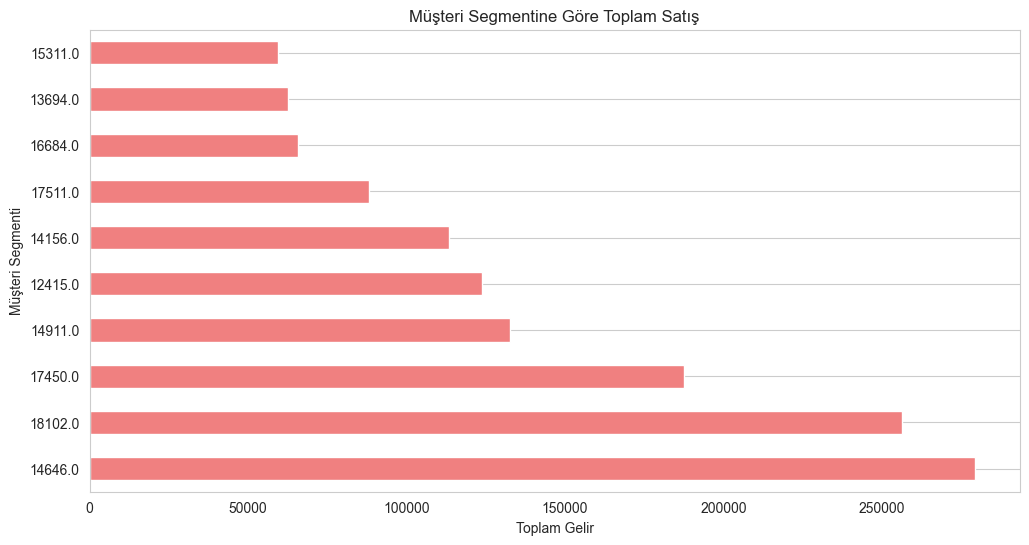

In [76]:
segment_sales = df.groupby('customerid')['sales'].sum().sort_values(ascending=False)
top_n_segments = segment_sales.head(10)  # En yüksek satış yapan 10 segmenti gösterelim

plt.figure(figsize=(12, 6))
top_n_segments.plot(kind='barh', color='lightcoral')  # Yatay grafik ile daha okunaklı hale getirelim
plt.title("Müşteri Segmentine Göre Toplam Satış")  
plt.xlabel("Toplam Gelir")  
plt.ylabel("Müşteri Segmenti")  
plt.grid(axis='x')  
plt.show()

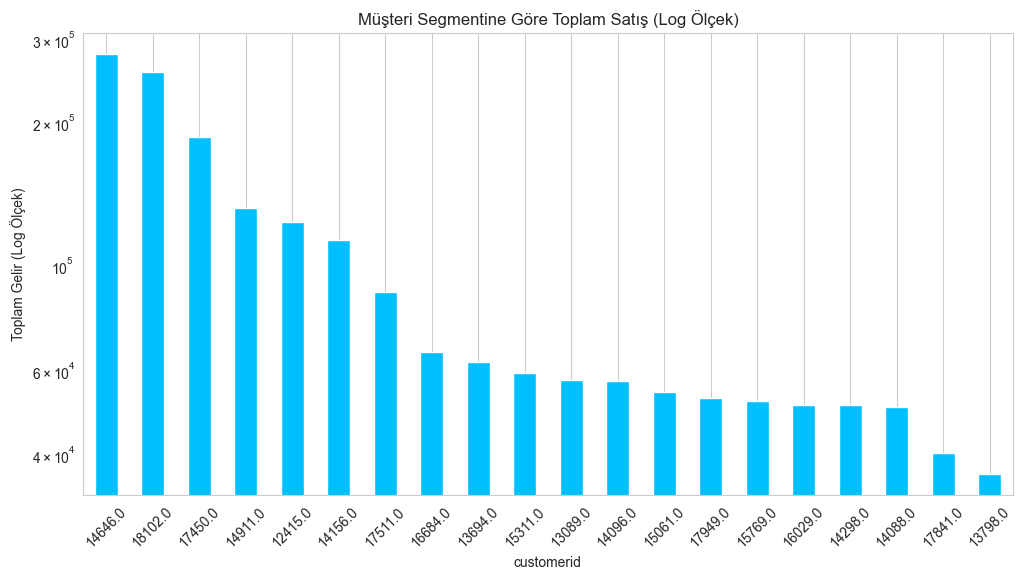

In [77]:
plt.figure(figsize=(12, 6))
segment_sales.head(20).plot(kind='bar', color='deepskyblue')
plt.yscale("log")  # Log ölçek ile küçük farkları da belirgin hale getir
plt.title("Müşteri Segmentine Göre Toplam Satış (Log Ölçek)")  
plt.ylabel("Toplam Gelir (Log Ölçek)")  
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()